In [18]:
!pip install opencv-python
import glob
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def getData(path, val, max=200):
    out_x = []
    out_y = []
    i = 0
    for file in path.glob("*.jpeg"):
        i+=1
        if i == max:
            break
        
        img = cv2.imread(str(file))
        img = cv2.resize(img, (400, 400))
        out_x.append(img)
        out_y.append(val)
        #out.append((file,0))
    return out_x, out_y

train_X,  train_Y= getData(Path("train/NORMAL"),0)
x, y = getData(Path("train/PNEUMONIA"),1)
train_X = train_X + x
train_Y = train_Y + y
train_X = np.stack(train_X)
train_Y = np.array(train_Y)

test_X,  test_Y= getData(Path("test/NORMAL"),0)
x, y = getData(Path("test/PNEUMONIA"),1)
test_X = test_X + x
test_Y = test_Y + y
test_X = np.stack(test_X)
test_Y = np.array(test_Y)

val_X,  val_Y= getData(Path("val/NORMAL"),0)
x, y = getData(Path("val/PNEUMONIA"),1)
val_X = val_X + x
val_Y = val_Y + y
val_X = np.stack(val_X)
val_Y = np.array(val_Y)

In [17]:
print(test_X.shape)

(398, 400, 400, 3)


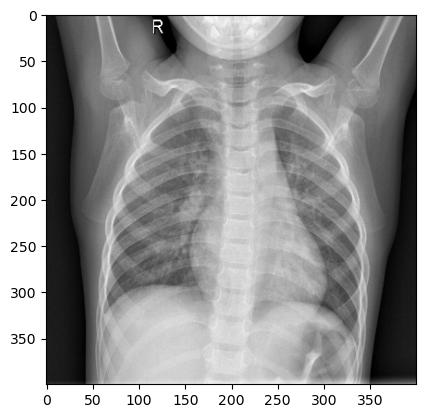

In [20]:
plt.imshow(train_X[0])